<a href="https://colab.research.google.com/github/Nazmiyeah/Data-science-task-1/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Columns found: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
✅ Accuracy: 0.8950899439693306

✅ Confusion Matrix:
 [[11596   370]
 [ 1053   545]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.60      0.34      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.66      0.69     13564
weighted avg       0.88      0.90      0.88     13564



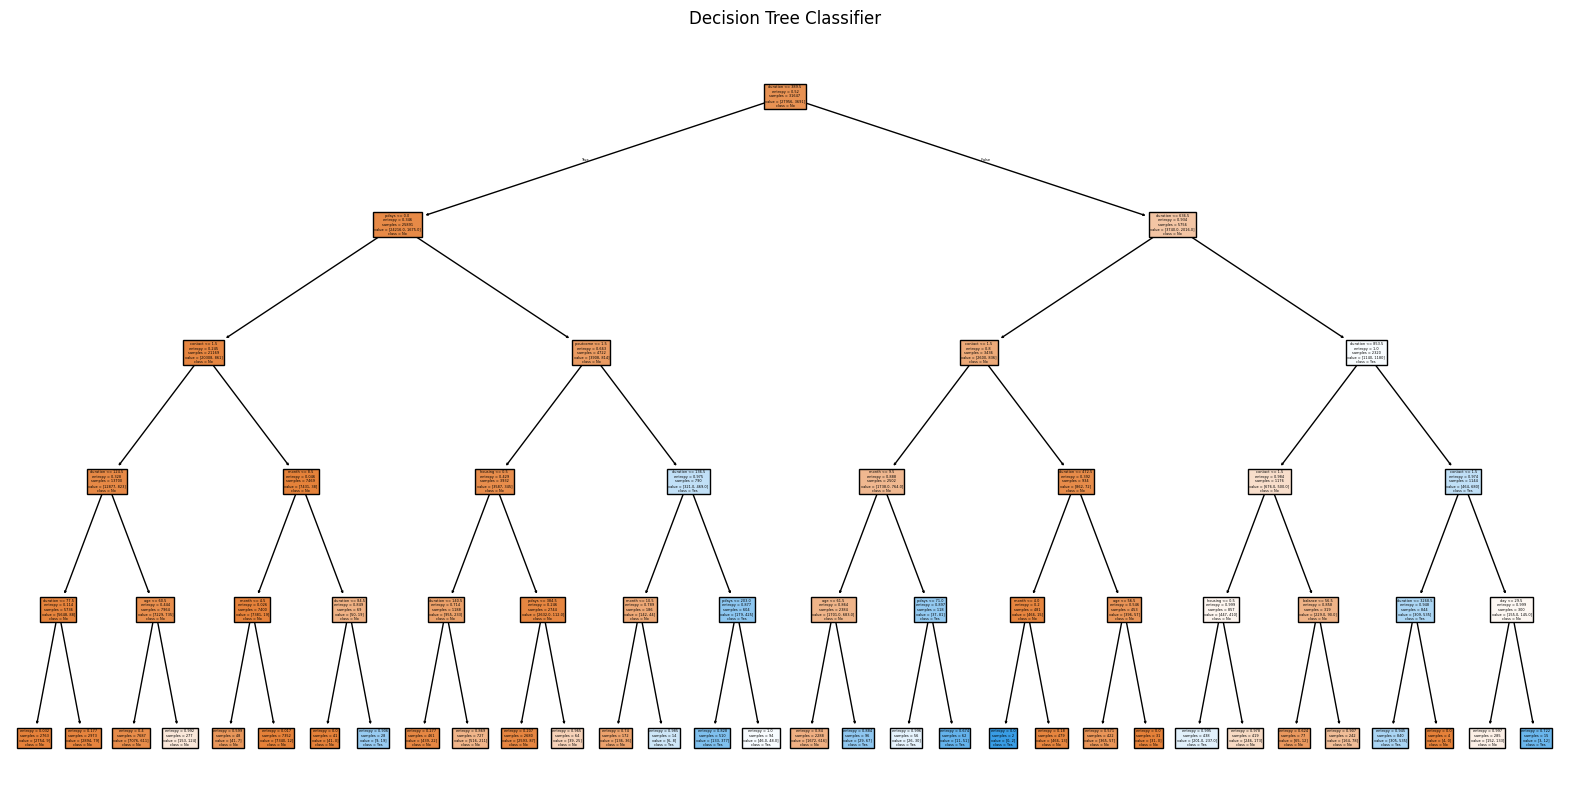

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# ✅ Load dataset using correct separator
df = pd.read_csv('/content/bank-full[1].csv', sep=';')

# ✅ Clean column names (remove spaces/quotes)
df.columns = df.columns.str.strip().str.replace('"', '')

# ✅ Confirm that 'y' is now present
print("✅ Columns found:", df.columns.tolist())
if 'y' not in df.columns:
    raise ValueError("Target column 'y' still not found. Please check the raw file.")

# ✅ Encode all categorical (object type) columns
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# ✅ Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# ✅ Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# ✅ Predict and evaluate
y_pred = clf.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Classifier")
plt.show()


